To see the entire document please use this link:

https://colab.research.google.com/github/CorkCork/Computational_Math/blob/master/Project%20Post-Coma.ipynb

## Post-Coma Recovery of IQ Data

## Overview
The "Post-Coma Recovery of IQ Data" available through https://vincentarelbundock.github.io/Rdatasets/datasets.html contains information about patients who sustained traumatic brain injuries resulting in comas of varying duration. In order to collect the data, after awakening from their comas, patients were periodically administered a standard IQ test. 

The data contains 331 rows and 7 columns. 

**Column Contents** (https://vincentarelbundock.github.io/Rdatasets/doc/carData/Wong.html): 

**id:**
patient ID number.

**days:**
number of days post coma at which IQs were measured.

**duration:**
duration of the coma in days.

**sex:**
a factor with levels 'Female' and 'Male'.

**age:**
in years at the time of injury.

**piq:**
performance (i.e., mathematical) IQ.

**viq:**
verbal IQ.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os, ssl
import seaborn as sns
import statsmodels.api as sm
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import probplot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)


postcoma = pd.read_csv('C:/Users/Inspiration/Desktop/Post_Coma_Recovery_of_IQ.csv')
postcoma = postcoma.drop(postcoma.columns[0], axis=1)

In [2]:
postcoma.head()

,id,days,duration,sex,age,piq,viq
0,3358,30,4,Male,20.67077,87,89
1,3535,16,17,Male,55.28816,95,77
2,3547,40,1,Male,55.91513,95,116
3,3592,13,10,Male,61.66461,59,73
4,3728,19,6,Male,30.12731,67,73


I will rename some of the columns to make more sense.

In [3]:
postcoma.rename(columns={'piq':'performanceiq', 
                         'viq':'verbaliq',}, inplace=True)
postcoma.head()

,id,days,duration,sex,age,performanceiq,verbaliq
0,3358,30,4,Male,20.67077,87,89
1,3535,16,17,Male,55.28816,95,77
2,3547,40,1,Male,55.91513,95,116
3,3592,13,10,Male,61.66461,59,73
4,3728,19,6,Male,30.12731,67,73


In [4]:
postcoma.shape

(331, 7)

Let's summarize the data.

In [5]:
pd.options.display.max_info_rows = 2000000
postcoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
id               331 non-null int64
days             331 non-null int64
duration         331 non-null int64
sex              331 non-null object
age              331 non-null float64
performanceiq    331 non-null int64
verbaliq         331 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 18.2+ KB


Each column contains 331 values (N = 331) which represent id, days, duration, sex, age, performance and verbal IQ. There are no missing values. I will transform the <code>age</code> column values from float to integer.

In [6]:
postcoma['age'] = postcoma.age.astype(int)
postcoma.head()

,id,days,duration,sex,age,performanceiq,verbaliq
0,3358,30,4,Male,20,87,89
1,3535,16,17,Male,55,95,77
2,3547,40,1,Male,55,95,116
3,3592,13,10,Male,61,59,73
4,3728,19,6,Male,30,67,73


Let's see some desriptive statistics for our columns that contain numeric values.

In [7]:
postcoma[['days', 'duration', 'age', 'performanceiq', 'verbaliq']].describe().round(1)

,days,duration,age,performanceiq,verbaliq
count,331.0,331.0,331.0,331.0,331.0
mean,481.9,14.3,31.4,87.6,95.0
std,1137.1,26.0,13.9,15.1,14.1
min,13.0,0.0,6.0,50.0,64.0
25%,59.0,1.0,21.0,77.0,85.0
50%,150.0,7.0,26.0,87.0,94.0
75%,416.0,16.0,40.0,97.0,105.0
max,11628.0,255.0,80.0,133.0,132.0


The average age is 31. The average number of days post coma when the IQs were measured (<code>days</code>) is 482. The average duration of coma in days (<code>duration</code>) is 14 with the minimum 0, maximum 255 days! Wow. 
<br/><br/>
The average verbal IQ is 95 (SD=14.1), which is higher than the average performance IQ of 88 (SD=15.1).

## Getting to Know the Data

### 1- Correlation Plot Using Pearson Correlation Matrix

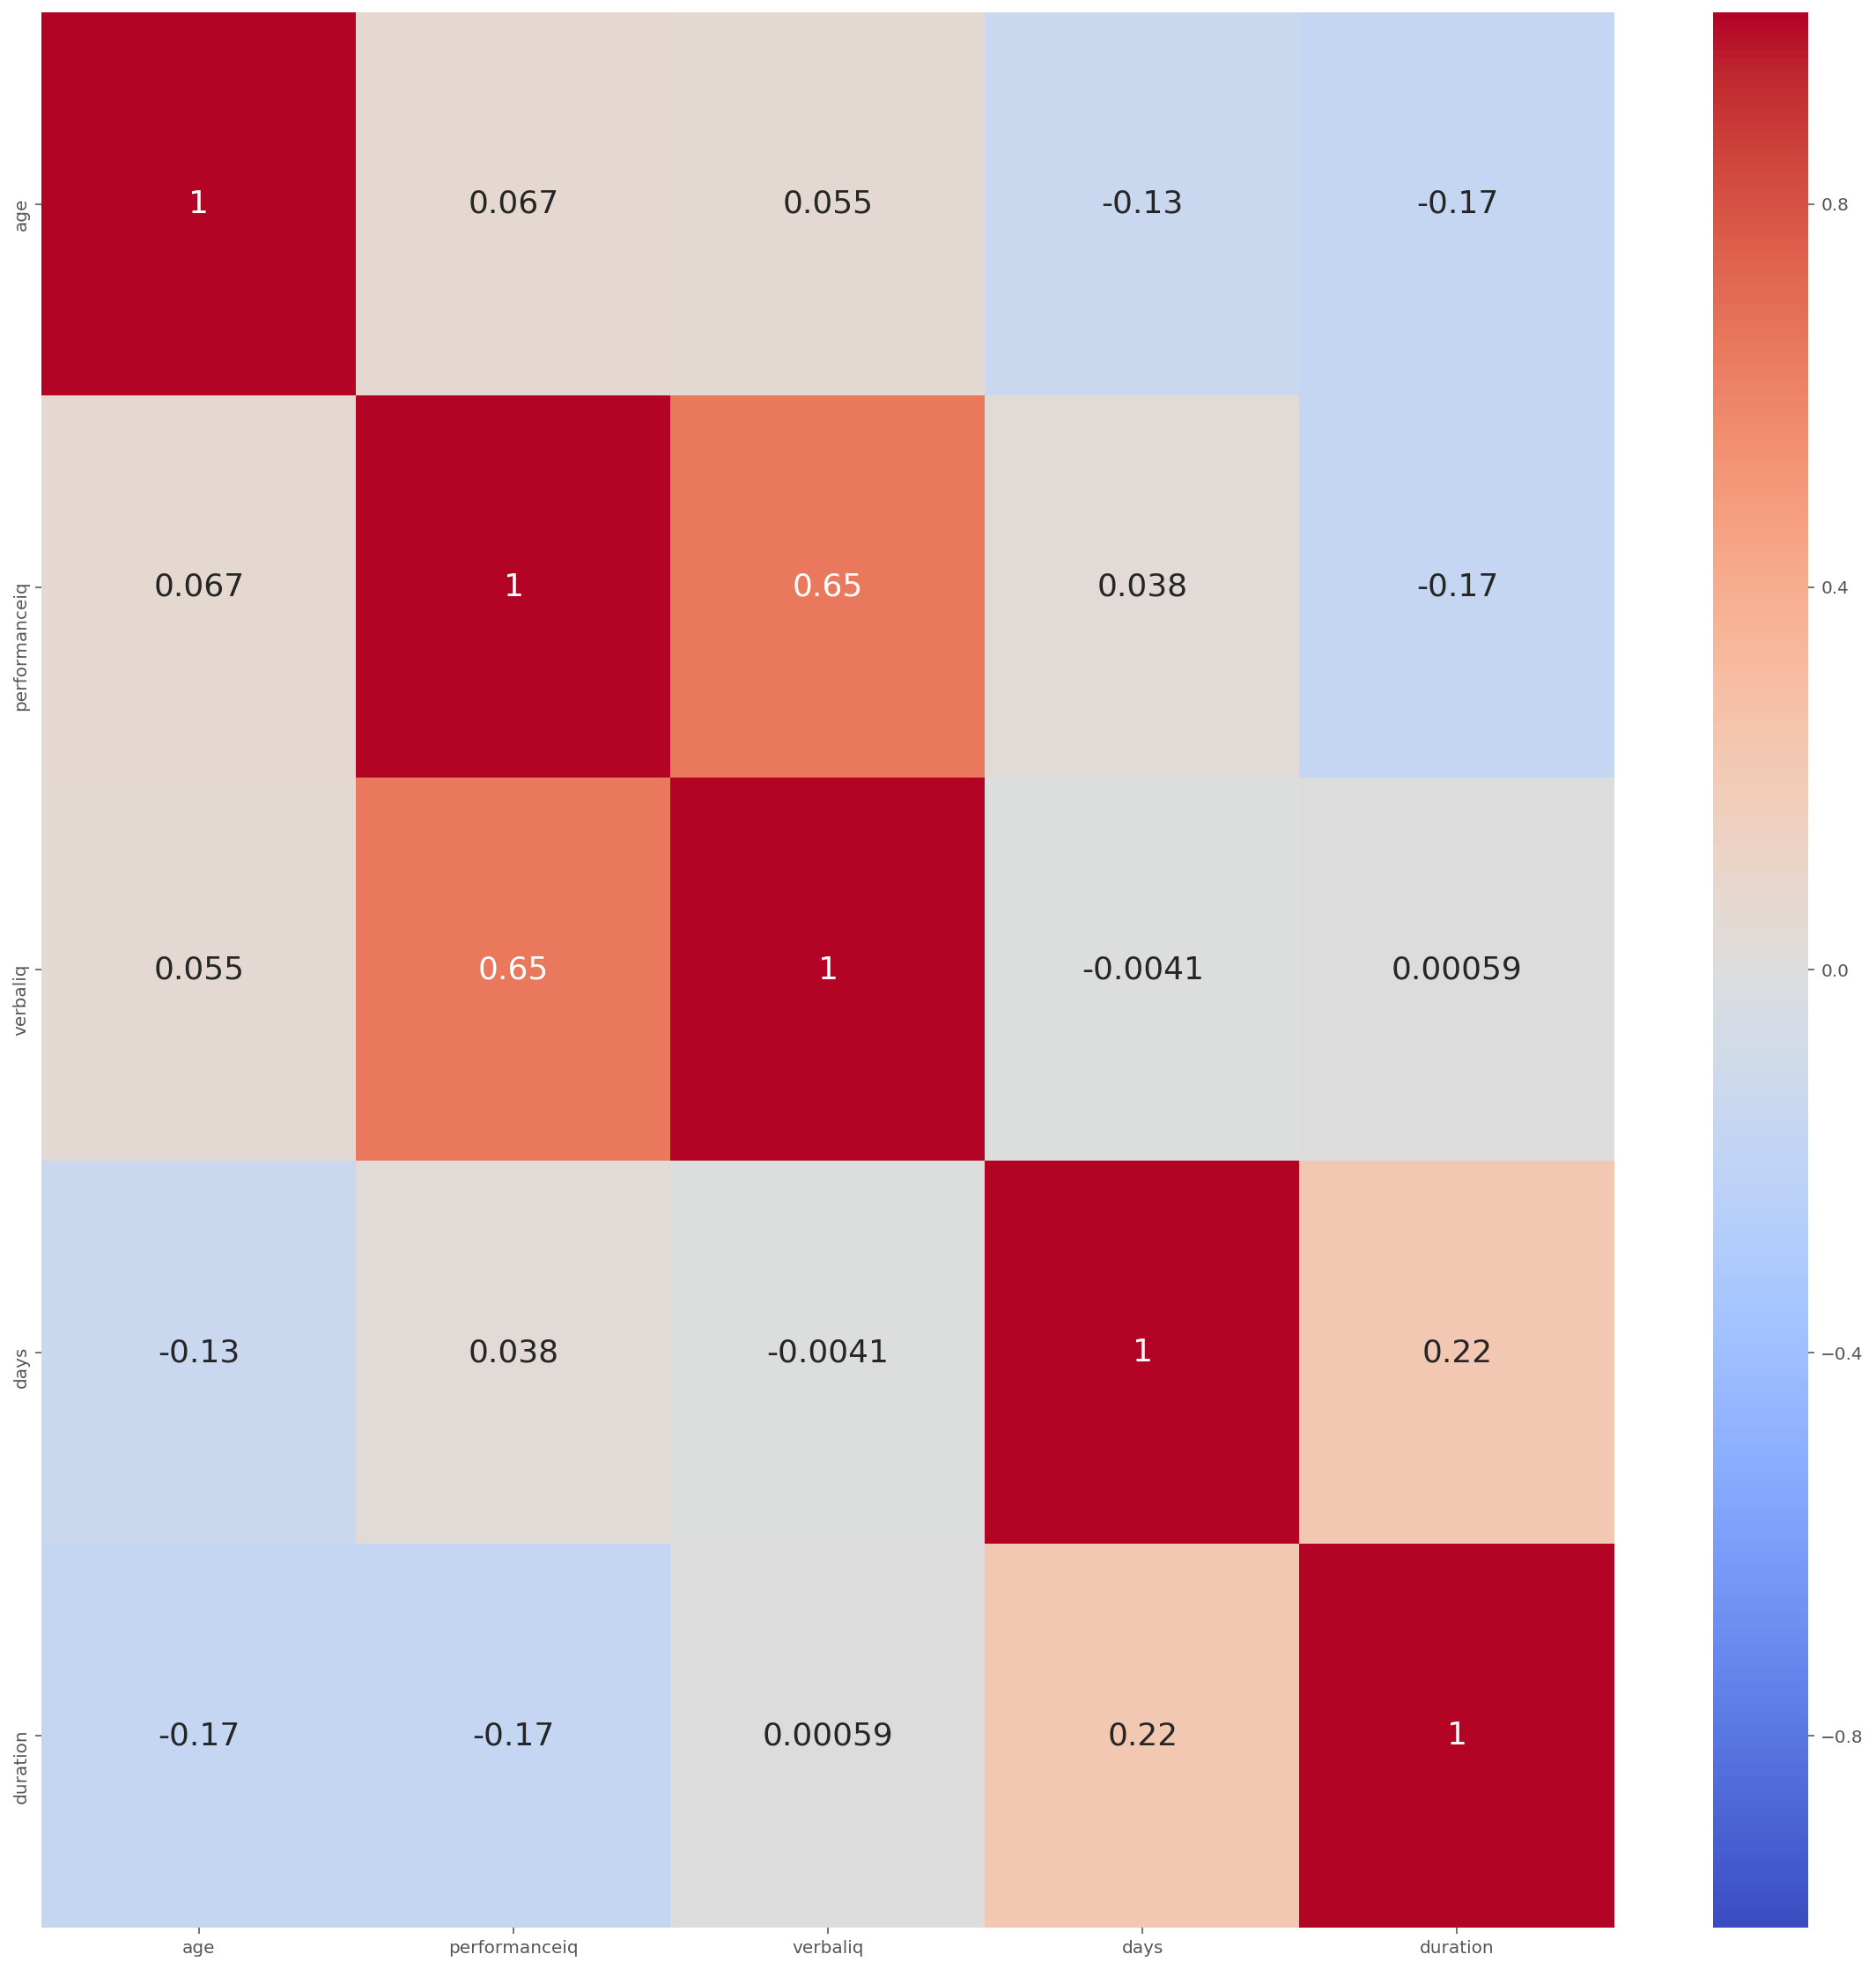

In [8]:
plt.figure(figsize=(20,20))
columns =['age','performanceiq','verbaliq','days','duration']
sns.heatmap(postcoma[columns].corr(),annot=True, vmin=-1,
            cmap='coolwarm', annot_kws={"fontsize":18})
#sns.set(font_scale=12)

Just based on this graphs, we see a strong correlation between verbal and performance IQ. No other strong correlations. 

There is a low negative correlation between age and days, age and duration. As age goes up days and duration go down.

### 2- Histograms and Q–Q Plots

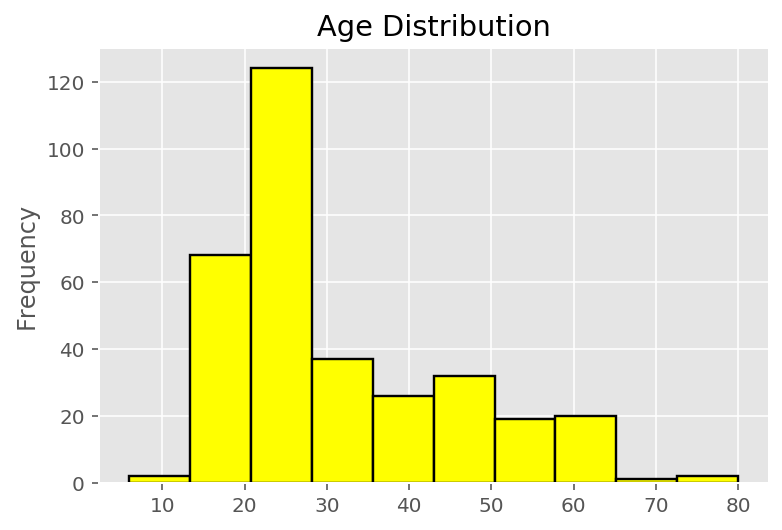

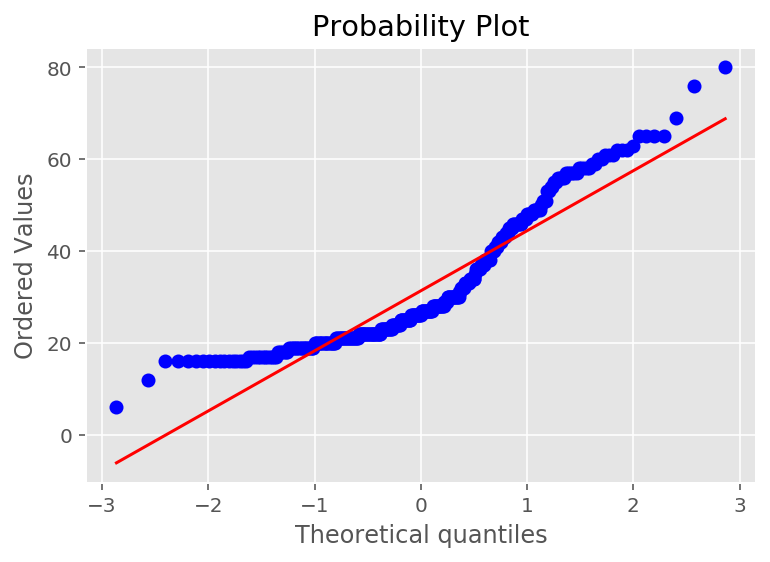

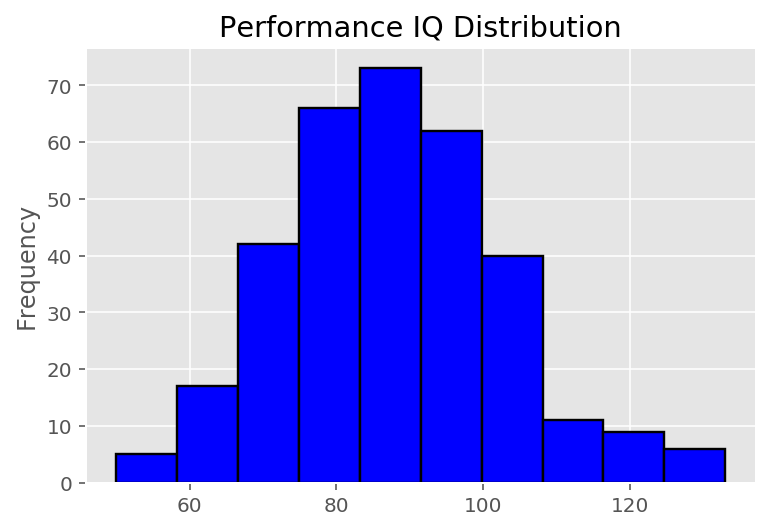

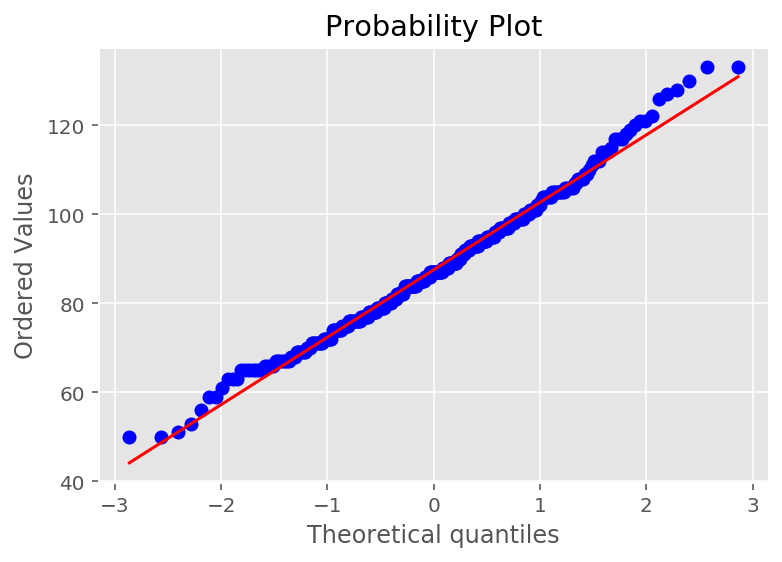

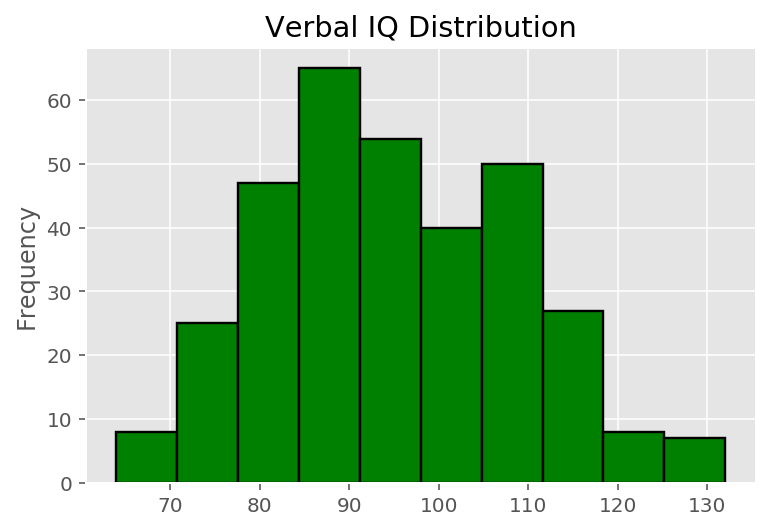

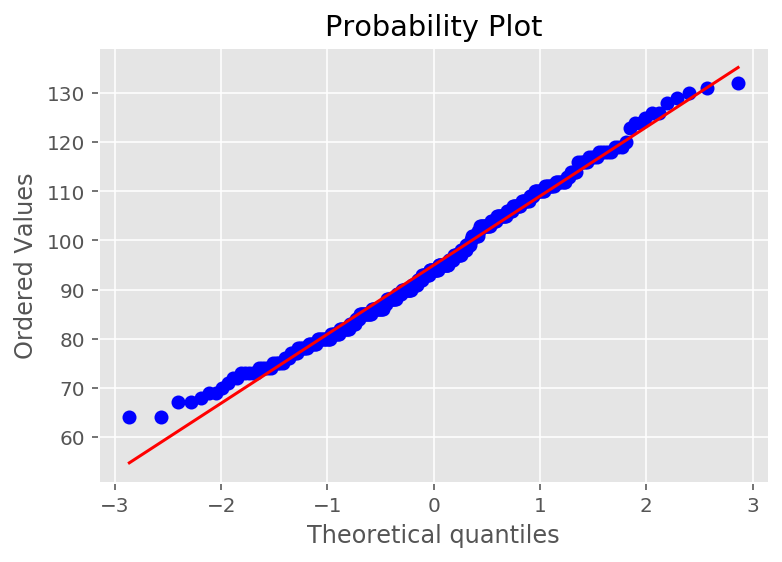

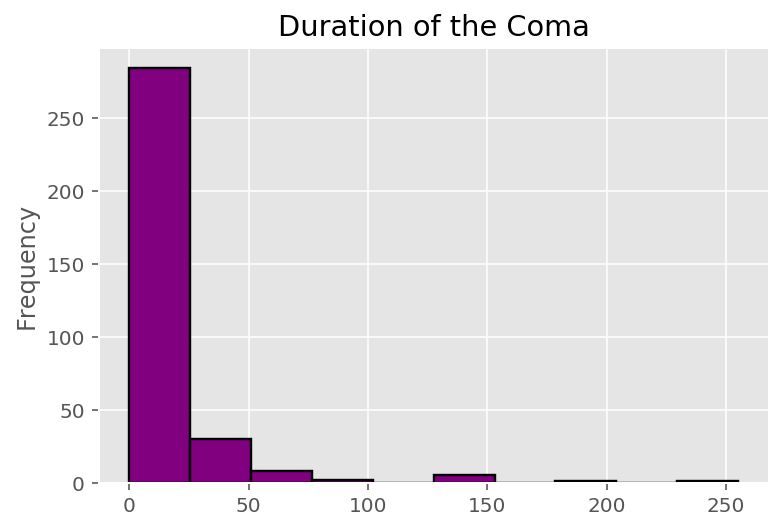

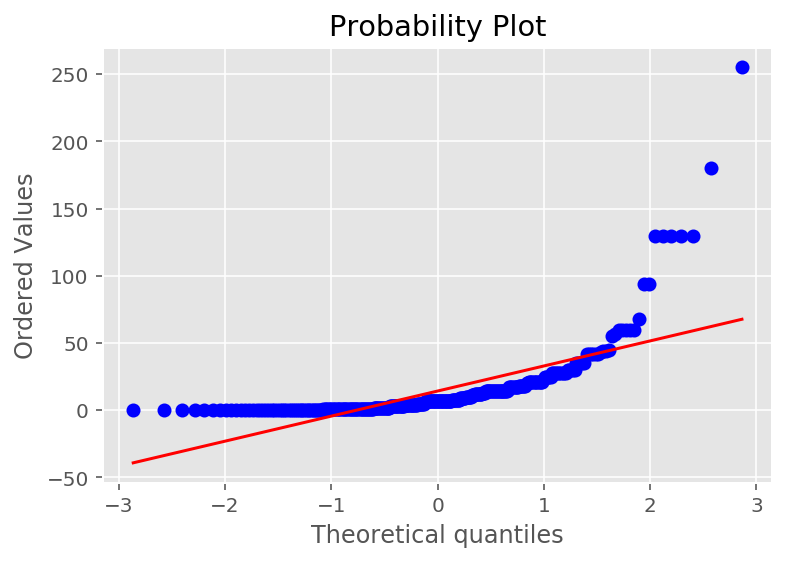

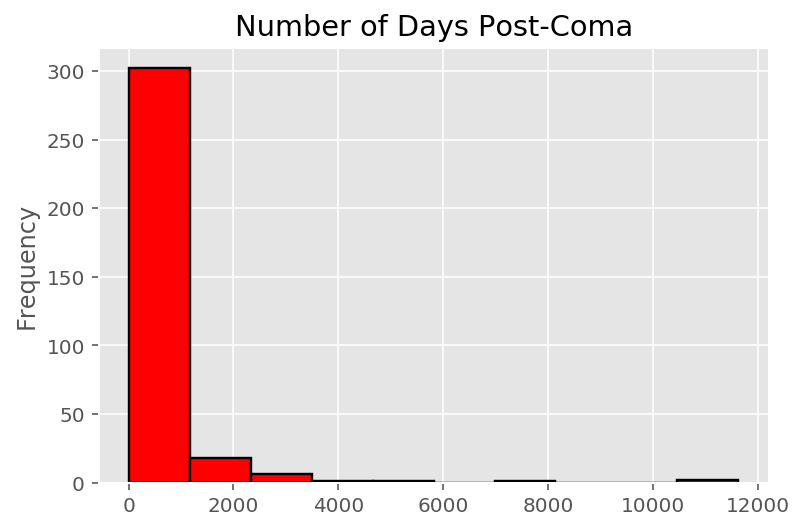

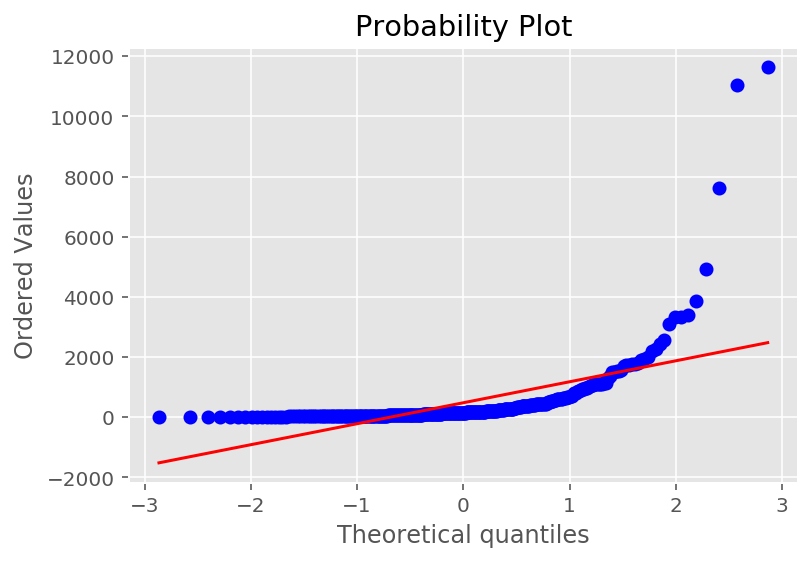

In [9]:
postcoma['age'].plot(kind = 'hist', color = 'yellow', edgecolor = 'black', linewidth = 1.2, title='Age Distribution')
plt.show(); 
probplot(postcoma['age'], plot = plt)
plt.show();
postcoma['performanceiq'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', linewidth = 1.2, title='Performance IQ Distribution')
plt.show();
probplot(postcoma['performanceiq'], plot = plt)
plt.show();
postcoma['verbaliq'].plot(kind = 'hist', color = 'green', edgecolor = 'black', linewidth = 1.2, title='Verbal IQ Distribution')
plt.show();
probplot(postcoma['verbaliq'], plot = plt)
plt.show();
postcoma['duration'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', linewidth = 1.2, title='Duration of the Coma')
plt.show();
probplot(postcoma['duration'], plot = plt)
plt.show();
postcoma['days'].plot(kind = 'hist', color = 'red', edgecolor = 'black', linewidth = 1.2, title='Number of Days Post-Coma')
plt.show();
probplot(postcoma['days'], plot = plt)
plt.show();

Age distribution is right skewed. We have individuals mostly below 30 years of age. Both performance and verbal IQ scores are nearly normally distributed. There is a slight right skew In the performance IQ--fewer scores in the upper range. There seem to be outliers in <code>days</code> and <code>duration</code>. 

In [10]:
print("Mean:",str(postcoma.performanceiq.mean()))
print("Median:",str(postcoma.performanceiq.median()))
print("IQR:",str(iqr(postcoma.performanceiq)))
print("SD:",str(postcoma.performanceiq.std()))

Mean: 87.5558912386707
Median: 87.0
IQR: 20.0
SD: 15.131515978057049


In [11]:
print("Mean:",str(postcoma.verbaliq.mean()))
print("Median:",str(postcoma.verbaliq.median()))
print("IQR:",str(iqr(postcoma.verbaliq)))
print("SD:",str(postcoma.verbaliq.std()))

Mean: 94.96374622356495
Median: 94.0
IQR: 20.0
SD: 14.053098973954683


In [12]:
print("Mean:",str(postcoma.days.mean()))
print("Median:",str(postcoma.days.median()))
print("IQR:",str(iqr(postcoma.days)))
print("SD:",str(postcoma.days.std()))

Mean: 481.8519637462236
Median: 150.0
IQR: 357.0
SD: 1137.0831500554705


In [13]:
print("Mean:",str(postcoma.duration.mean()))
print("Median:",str(postcoma.duration.median()))
print("IQR:",str(iqr(postcoma.duration)))
print("SD:",str(postcoma.duration.std()))

Mean: 14.29607250755287
Median: 7.0
IQR: 15.0
SD: 26.039886939093794


Let's see some of the relationships between variables.

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140.]),
 <a list of 9 Text yticklabel objects>)

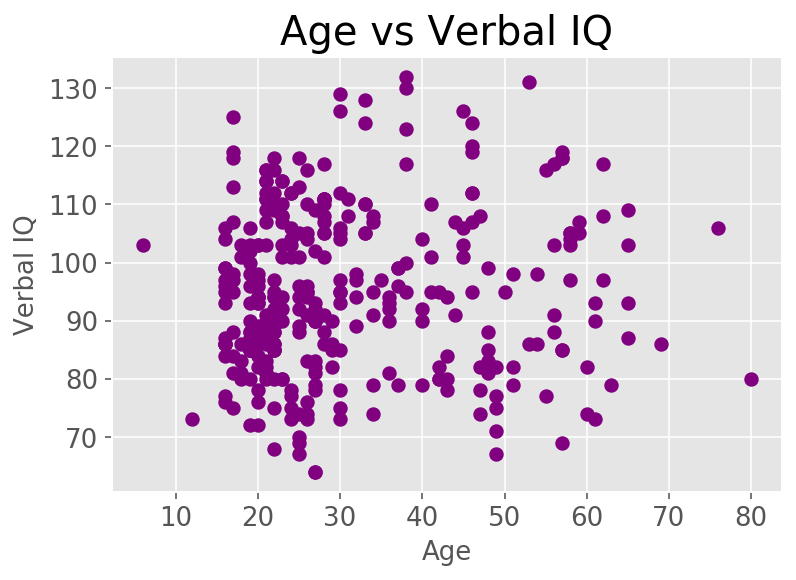

In [14]:
plt.scatter(postcoma.age, postcoma.verbaliq, marker='o', color = 'purple', linewidth = 1.2);
plt.title('Age vs Verbal IQ', fontsize=20)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Verbal IQ', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([ 40.,  60.,  80., 100., 120., 140.]),
 <a list of 6 Text yticklabel objects>)

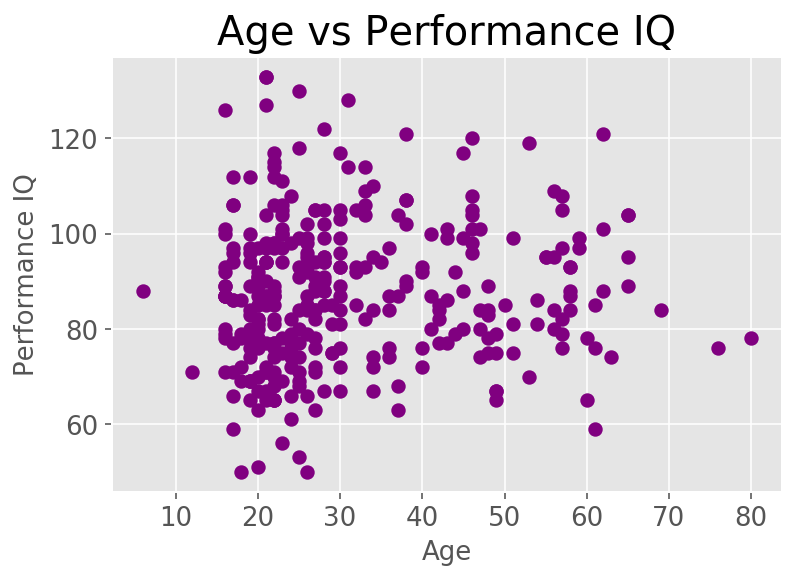

In [15]:
plt.scatter(postcoma.age, postcoma.performanceiq, marker='o', color = 'purple', linewidth = 1.2);
plt.title('Age vs Performance IQ', fontsize=20)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Performance IQ', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

There is no clear relationship between age and performance or verbal IQ. There are few outliers in both.

(array([ 40.,  60.,  80., 100., 120., 140.]),
 <a list of 6 Text yticklabel objects>)

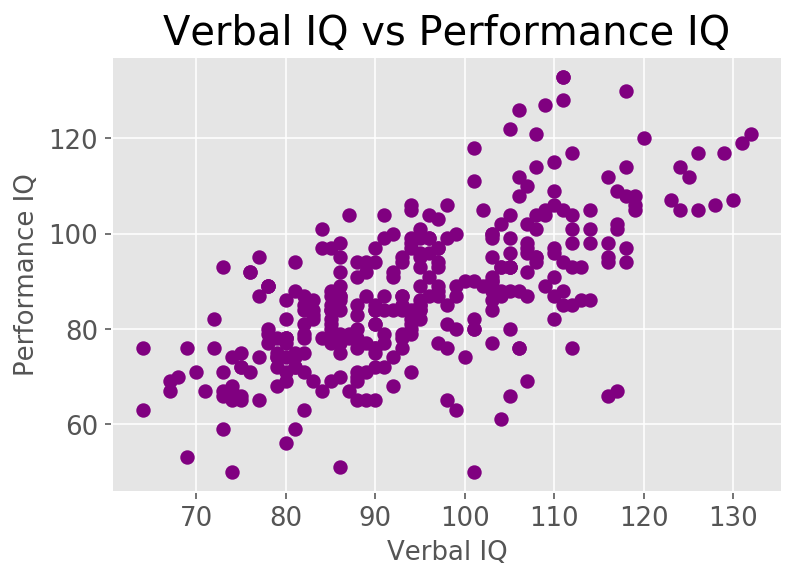

In [16]:
plt.scatter(postcoma.verbaliq, postcoma.performanceiq, marker='o', color = 'purple', linewidth = 1.2);
plt.title('Verbal IQ vs Performance IQ', fontsize=20)
plt.xlabel('Verbal IQ', fontsize=13)
plt.ylabel('Performance IQ', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

There is a positive linear relationship between verbal and performance IQ. As the verbal IQ goes up, so does the performance IQ. 

## My questions are:
    1- What is the age and gender distribution in this dataset?
    2- Are females and males tend to have different IQs after TBI?
    3- Is there a difference between female and male duration of coma?
    4- Can we predict performance IQ?
    5- Can we predict verbal IQ?

### 1- What is the age and gender distribution in this dataset?

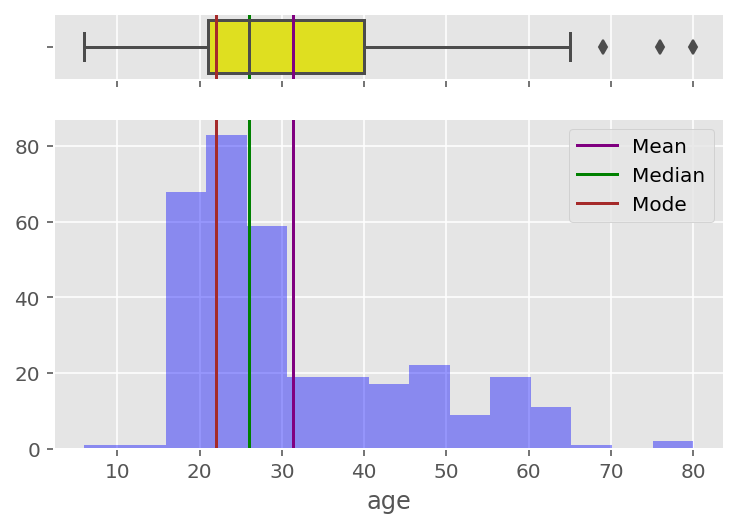

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=postcoma.age.mean()
median=postcoma.age.median()
mode=postcoma.age.mode()[0]

sns.boxplot(postcoma.age, ax=ax_box, color='yellow')
ax_box.axvline(mean, color='purple', linestyle='solid')
ax_box.axvline(median, color='green', linestyle='solid')
ax_box.axvline(mode, color='brown', linestyle='solid')

sns.distplot(postcoma.age, ax=ax_hist,bins=15,norm_hist=False,kde=False, color='blue')
ax_hist.axvline(mean, color='purple', linestyle='solid')
ax_hist.axvline(median, color='green', linestyle='solid')
ax_hist.axvline(mode, color='brown', linestyle='solid')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

In [18]:
print("Mean:",str(mean))
print("Median:",str(median))
print("Mode:",str(mode))
print("IQR:",str(iqr(postcoma.age)))
print("SD:",str(postcoma.age.std()))

Mean: 31.3595166163142
Median: 26.0
Mode: 22
IQR: 19.0
SD: 13.866486470564917


Age distribution is right skewed. We have more individuals with younger ages (<30). The mean age is 31.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

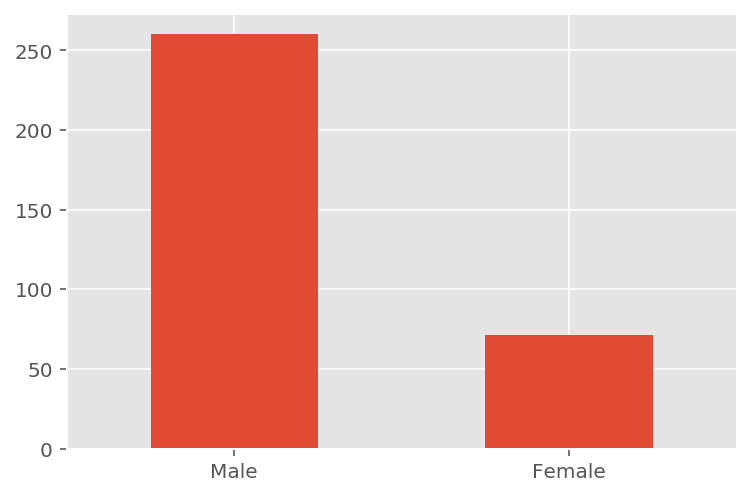

In [19]:
counts = pd.value_counts(postcoma['sex'].values, sort=True)
counts.plot.bar()
plt.xticks(rotation=0)

In [20]:
postcoma['sex'].value_counts()

Male      260
Female     71
Name: sex, dtype: int64

There are 260 (78.5%) males and 71 (21.5%) females. There are more male TBI patients than female. I will use two-sample T-test to see whether age has a mean that differs between females and males. 

In [21]:
stats.ttest_ind(postcoma[['age']][postcoma['sex'] == 'Female'], postcoma[['age']][postcoma['sex'] == 'Male'])

Ttest_indResult(statistic=array([-0.72881557]), pvalue=array([0.46663296]))

Our p-value is more than 0.05, so no statistically significant difference. We cannot reject the null hypothesis (null: the age means are equal for females and males).

### 2- Are females and males tend to have different IQs after TBI?

HO: There is no difference in the mean performance IQs between females and males after TBI.

HA: There is a difference in the mean performance IQs between females and males after TBI.

In [22]:
import statsmodels.stats.weightstats as st


femperf = postcoma[postcoma['sex'] == 'Female']['performanceiq'] 
malperf = postcoma[postcoma['sex'] == 'Male']['performanceiq']
f11 = st.DescrStatsW(femperf)
f22 = st.DescrStatsW(malperf)
copme3 = st.CompareMeans(f11, f22)

n_femperf = f11.nobs
n_malperf = f22.nobs
mean_femperf = f11.mean
mean_malperf = f22.mean
sd_femperf = f11.std
sd_malperf = f22.std
print(f'n_femperf = {n_femperf}')
print(f'mean_femperf = {mean_femperf}')
print(f'sd_femperf = {sd_femperf}')
print()
print(f'n_malperf = {n_malperf}')
print(f'mean_malperf = {mean_malperf}')
print(f'sd_malperf = {sd_malperf}')
print()

hyte3 = copme3.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)
st3 = copme3.std_meandiff_separatevar
testZ3 = hyte3[0]
p_value3 = hyte3[1]
print(f'Standard error = {st3}')
print(f'Test statistic: Z = {testZ3}')
print(f'p-value = {p_value3}')

if(p_value3) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_femperf = 71.0
mean_femperf = 89.1830985915493
sd_femperf = 17.871457974016565

n_malperf = 260.0
mean_malperf = 87.11153846153846
sd_malperf = 14.229136600734666

Standard error = 2.311802574231131
Test statistic: Z = 0.8960800342995577
p-value = 0.37021001960485755
accept null hypothesis


There is no difference in the mean performance IQs between females and males after TBI.

HO: There is no difference in the mean verbal IQs between females and males after TBI.

HA: There is a difference in the mean verbal IQs between females and males after TBI.

In [40]:
import statsmodels.stats.weightstats as st


femverb = postcoma[postcoma['sex'] == 'Female']['verbaliq'] 
malverb = postcoma[postcoma['sex'] == 'Male']['verbaliq']
f111 = st.DescrStatsW(femverb)
f222 = st.DescrStatsW(malverb)
copme4 = st.CompareMeans(f111, f222)

n_femverb = f111.nobs
n_malverb = f222.nobs
mean_femverb = f111.mean
mean_malverb = f222.mean
sd_femverb = f111.std
sd_malverb = f222.std
print(f'n_femverb = {n_femverb}')
print(f'mean_femverb = {mean_femverb}')
print(f'sd_femverb = {sd_femverb}')
print()
print(f'n_malverb = {n_malverb}')
print(f'mean_malverb = {mean_malverb}')
print(f'sd_malverb = {sd_malverb}')
print()

hyte4 = copme4.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)
st4 = copme4.std_meandiff_separatevar
testZ4 = hyte4[0]
p_value4 = hyte4[1]
print(f'Standard error = {st4}')
print(f'Test statistic: Z = {testZ4}')
print(f'p-value = {p_value4}')

if(p_value4) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_femverb = 71.0
mean_femverb = 94.35211267605634
sd_femverb = 14.146216924785183

n_malverb = 260.0
mean_malverb = 95.13076923076923
sd_malverb = 13.995817211162915

Standard error = 1.9013407955120207
Test statistic: Z = -0.40953024126493215
p-value = 0.6821505784986379
accept null hypothesis


There is no difference in the mean verbal IQs between females and males after TBI.

Mean: sex
Female    89.183099
Male      87.111538
Name: performanceiq, dtype: float64
SD: sex
Female    17.998659
Male      14.256580
Name: performanceiq, dtype: float64


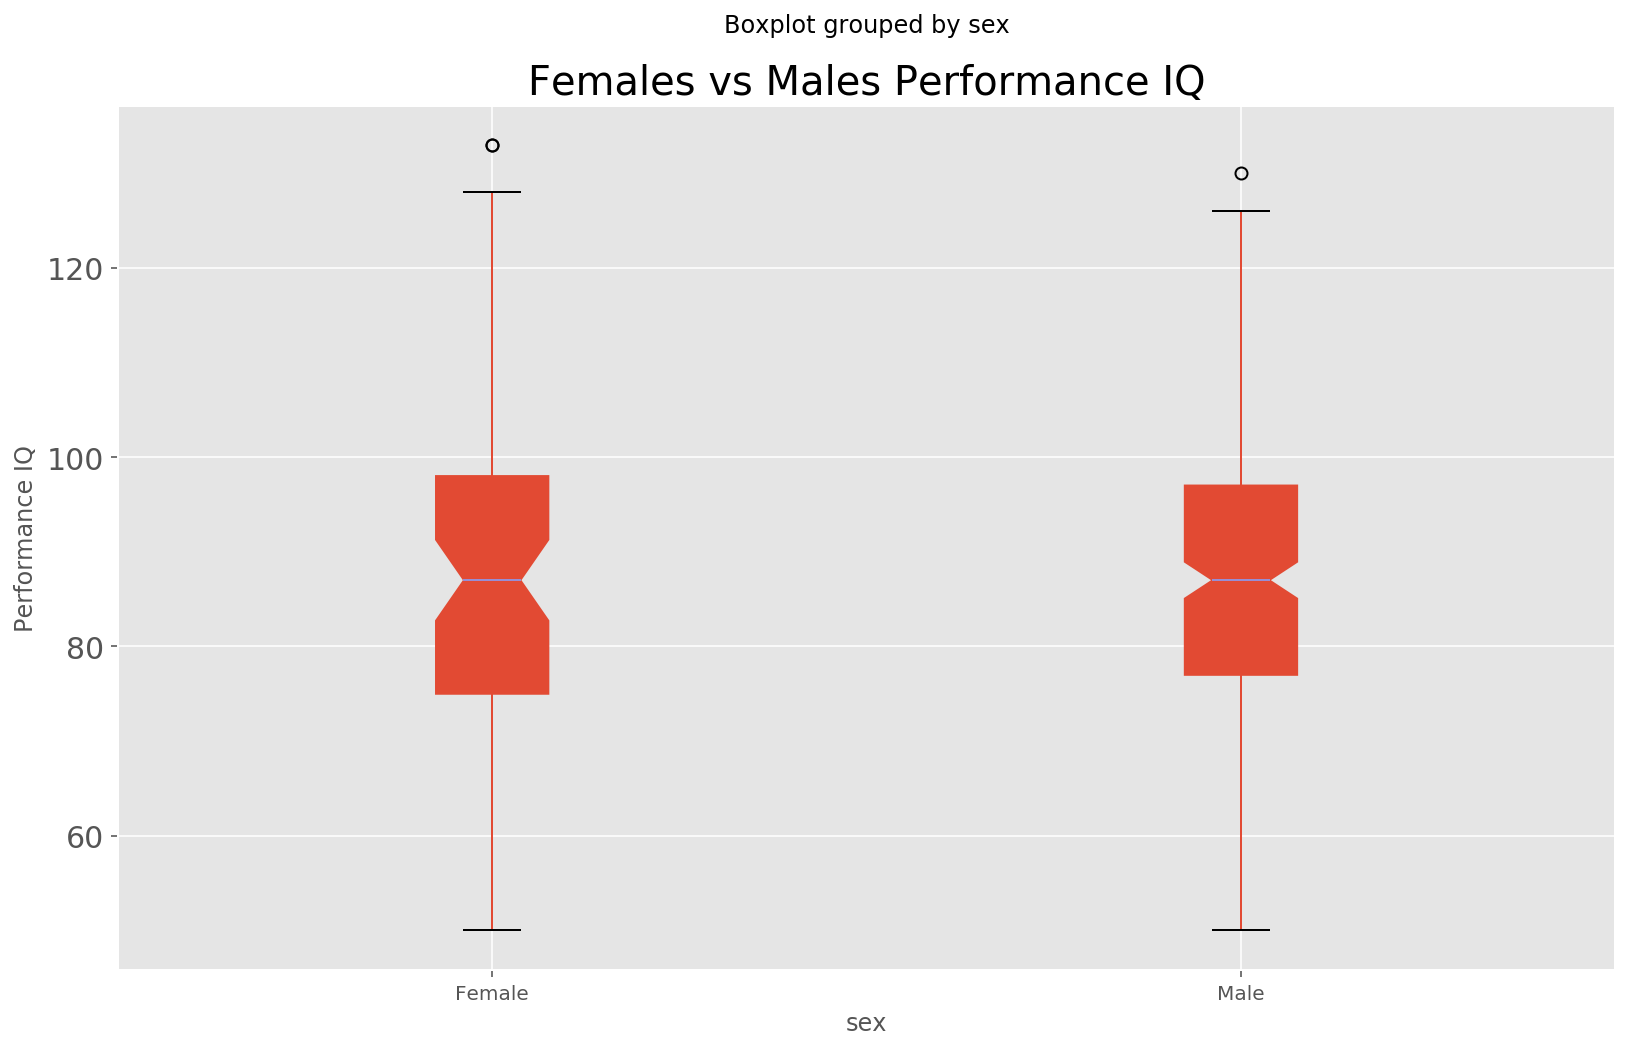

In [24]:
print("Mean:",str(postcoma.groupby(['sex'])['performanceiq'].mean()));

print("SD:",str(postcoma.groupby(['sex'])['performanceiq'].std()))

postcoma.boxplot(column = 'performanceiq', by = 'sex', figsize=(13, 8), notch=True, patch_artist=True)
plt.title('Females vs Males Performance IQ', fontsize=20)
plt.ylabel('Performance IQ', fontsize=12)
plt.yticks(fontsize=15)
plt.show();

Mean: sex
Female    94.352113
Male      95.130769
Name: verbaliq, dtype: float64
SD: sex
Female    14.246903
Male      14.022810
Name: verbaliq, dtype: float64


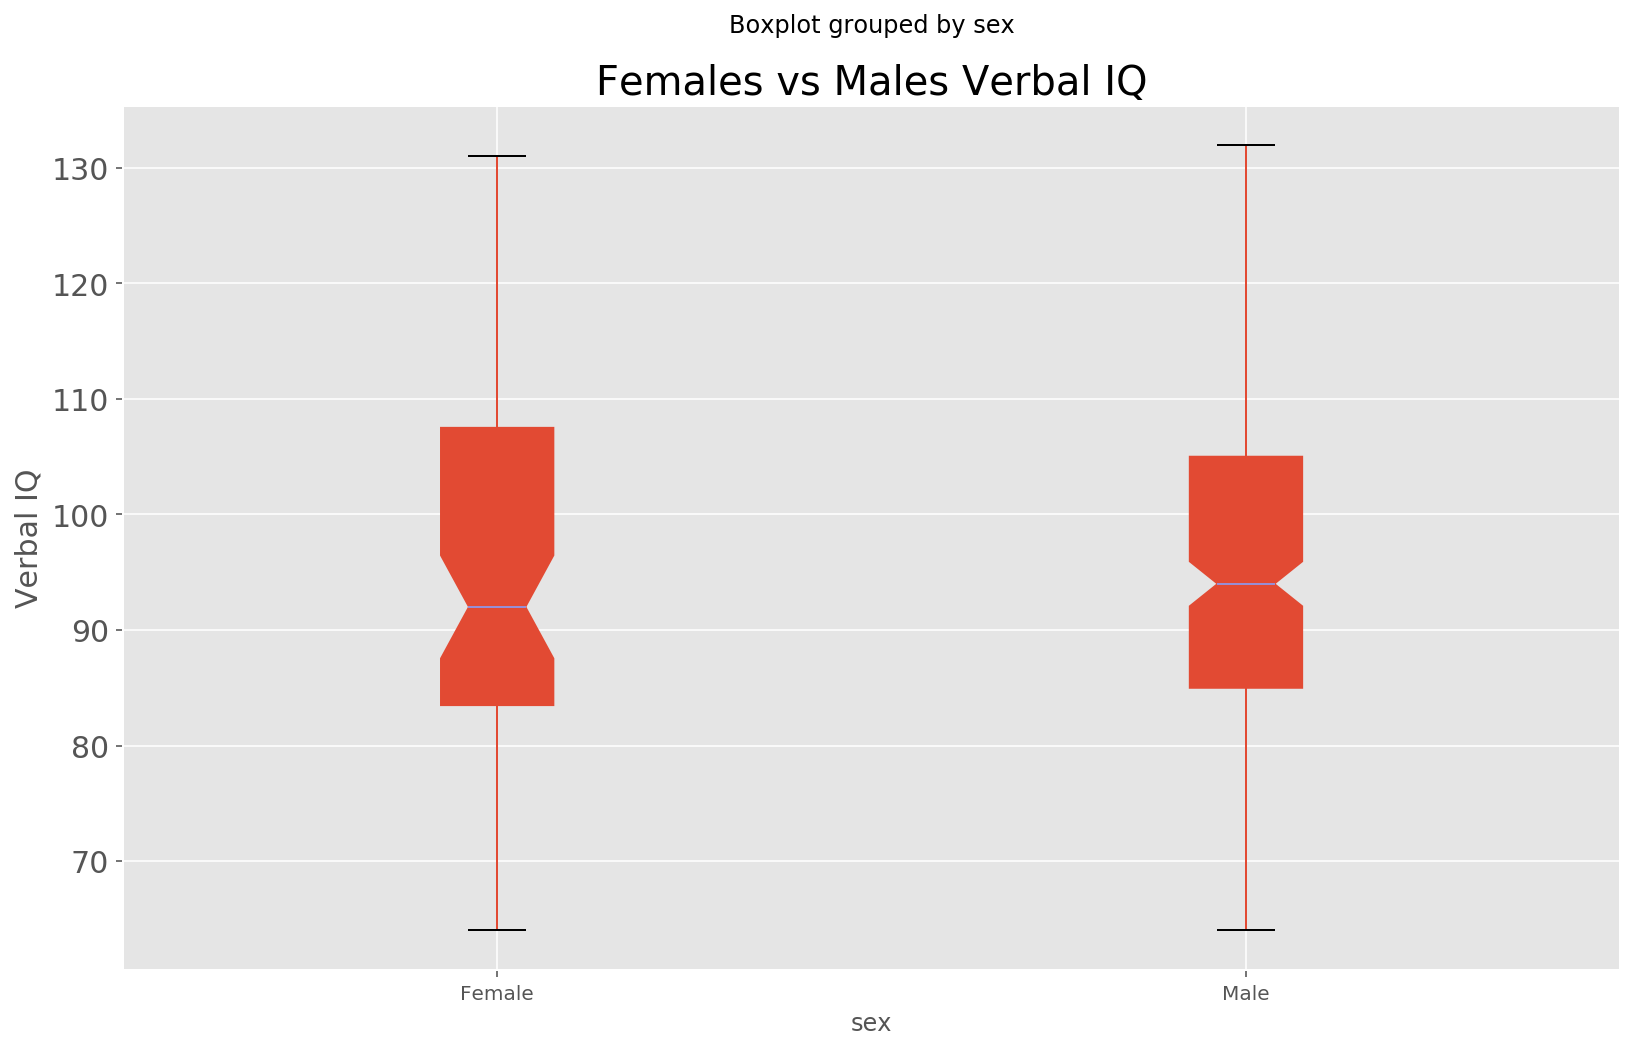

In [25]:
print("Mean:",str(postcoma.groupby(['sex'])['verbaliq'].mean()));

print("SD:",str(postcoma.groupby(['sex'])['verbaliq'].std()))

postcoma.boxplot(column = 'verbaliq', by = 'sex', figsize=(13, 8), notch=True, patch_artist=True)
plt.title('Females vs Males Verbal IQ', fontsize=20)
plt.ylabel('Verbal IQ', fontsize=15)
plt.yticks(fontsize=15)
plt.show();

No difference between female and male performance and verbal IQs.

### 3- Is there a difference between female and male duration of coma?

HO: There is no difference in the mean durations of coma between females and males.

HA: There is a difference in the mean durations of coma between females and males.

In [26]:
import statsmodels.stats.weightstats as st


femdur = postcoma[postcoma['sex'] == 'Female']['duration'] 
maldur = postcoma[postcoma['sex'] == 'Male']['duration']
f1 = st.DescrStatsW(femdur)
f2 = st.DescrStatsW(maldur)
copme = st.CompareMeans(f1, f2)

n_femdur = f1.nobs
n_maldur = f2.nobs
mean_femdur = f1.mean
mean_maldur = f2.mean
sd_femdur = f1.std
sd_maldur = f2.std
print(f'n_femdur = {n_femdur}')
print(f'mean_femdur = {mean_femdur}')
print(f'sd_femdur = {sd_femdur}')
print()
print(f'n_maldur = {n_maldur}')
print(f'mean_maldur = {mean_maldur}')
print(f'sd_maldur = {sd_maldur}')
print()

hyte = copme.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)
st = copme.std_meandiff_separatevar
testZ = hyte[0]
p_value = hyte[1]
print(f'Standard error = {st}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_femdur = 71.0
mean_femdur = 9.267605633802816
sd_femdur = 13.090107808418715

n_maldur = 260.0
mean_maldur = 15.669230769230769
sd_maldur = 28.373440577017

Standard error = 2.3571550019969845
Test statistic: Z = -2.715826973620525
p-value = 0.006611045896927379
reject null hypothesis


In [27]:
males = postcoma[postcoma['sex'] == 'Male']
females = postcoma[postcoma['sex'] == 'Female']

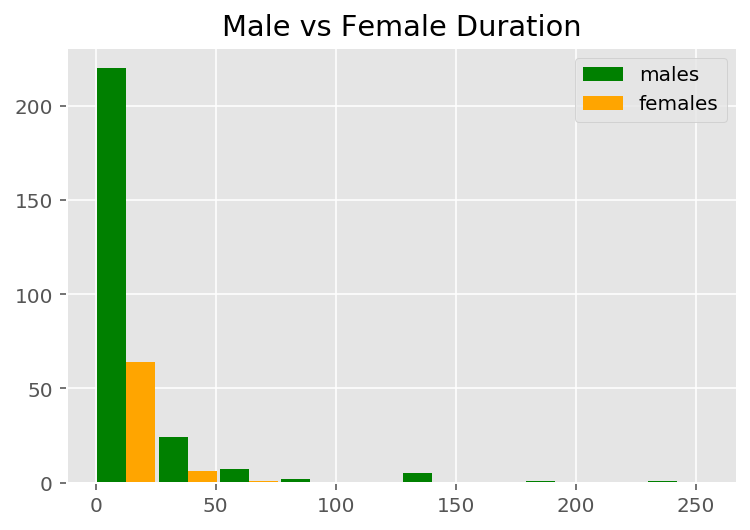

In [28]:
plt.hist([males.duration, females.duration], rwidth = 0.95, color=['green', 'orange'], 
         label=['males', 'females'])
plt.title('Male vs Female Duration')
plt.legend()

We reject the null hypothesis. There is a difference in the mean durations of coma between females and males.
<div>
Let's construct a confidence interval for the difference between female and male duration and then check which one has longer duration.

In [29]:
diff = femdur.mean() - maldur.mean()
diff

-6.4016251354279525

In [30]:
import numpy as np, statsmodels.stats.api as sms

ss = sms.CompareMeans(sms.DescrStatsW(femdur), sms.DescrStatsW(maldur))

In [31]:
ss.tconfint_diff(usevar='unequal')   # 95% CI

(-11.04393204242754, -1.7593182284283646)

In [32]:
hyte2 = copme.ztest_ind(alternative = 'larger', usevar = 'unequal', value = 0)

st2 = copme.std_meandiff_separatevar
testZ2 = hyte2[0]
p_value2 = hyte2[1]
print(f'Standard error = {st2}')
print(f'Test statistic: Z = {testZ2}')
print(f'p-value = {p_value2}')

if(p_value2) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

Standard error = 2.3571550019969845
Test statistic: Z = -2.715826973620525
p-value = 0.9966944770515364
accept null hypothesis


Males have longer duration of coma.

###  4- Can we predict performance IQ?

In [33]:
postcoma.corr()

,id,days,duration,age,performanceiq,verbaliq
id,1.000000,-0.185893,-0.392644,0.205177,0.113751,-0.061580
days,-0.185893,1.000000,0.219891,-0.133462,0.037635,-0.004057
duration,-0.392644,0.219891,1.000000,-0.165716,-0.170683,0.000593
age,0.205177,-0.133462,-0.165716,1.000000,0.066952,0.055132
performanceiq,0.113751,0.037635,-0.170683,0.066952,1.000000,0.651032
verbaliq,-0.061580,-0.004057,0.000593,0.055132,0.651032,1.000000


In [34]:
m_full = sm.formula.ols(formula = 'performanceiq ~ age + duration + verbaliq + sex', data = postcoma)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          performanceiq   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     68.34
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           5.90e-42
Time:                        00:35:51   Log-Likelihood:                -1267.6
No. Observations:                 331   AIC:                             2545.
Df Residuals:                     326   BIC:                             2564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      23.6298      4.523      5.224      

If all other variables are held constant...

for every single unit increase in duration, the performance IQ decreases by 0.09.
<div>
for every single unit increase in verbal IQ, the performance IQ increases by 0.70.    

<div>

Above two have statistically significant p-values. Sex and age have p-values that are not statistically significant.

Since verbal IQ and performance IQ have the highest correlation, let's look into them more with the help of linear regression...

In [35]:
postcoma['performanceiq'].corr(postcoma['verbaliq'])

0.6510315162851065

Strong correlation.

In [36]:
import statsmodels.api as sm

formula_string_duration = "performanceiq ~ verbaliq"

model_duration = sm.formula.ols(formula = formula_string_duration, data = postcoma)
model_fitted_duration = model_duration.fit()

print(model_fitted_duration.summary())

                            OLS Regression Results                            
Dep. Variable:          performanceiq   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     242.0
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           2.73e-41
Time:                        00:35:52   Log-Likelihood:                -1277.2
No. Observations:                 331   AIC:                             2558.
Df Residuals:                     329   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9872      4.325      4.852      0.0

In [37]:
print('Intercept =', model_fitted_duration.params[0])
print('Slope =', model_fitted_duration.params[1])

Intercept = 20.987174081258352
Slope = 0.7009908497153787


In [38]:
print('R-squared =', model_fitted_duration.rsquared)

R-squared = 0.42384203519648533


Verbal IQ explains 42% of the variability in performance IQ. The model predicts that the performance IQ will increase 0.70 with each additional verbal IQ.

###  5- Can we predict verbal IQ?

In [39]:
m_full = sm.formula.ols(formula = 'verbaliq ~ age + performanceiq + duration + sex', data = postcoma)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               verbaliq   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     63.99
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           6.87e-40
Time:                        00:35:53   Log-Likelihood:                -1248.0
No. Observations:                 331   AIC:                             2506.
Df Residuals:                     326   BIC:                             2525.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        37.3205      3.927      9.503

If all other variables are held constant...

for every single unit increase in performance IQ, the verbal IQ increases by 0.62.    
<div>
for every single unit increase in duration, the verbal IQ increases by 0.06.    

<div>
    

Above two have statistically significant p-values. Sex, age and days have p-values that are not statistically significant.

**Conclusions**


- In this data we have more TBI patients with younger ages (<30). There are more males (N=260, 78.5%) than females (N=71, 21.5%) but the age means are not different.

- Males and females tend to have similar IQs after TBI. There is no difference in the mean performance and verbal IQs between females and males after TBI.

- There is a difference in the mean durations of coma between females and males. Males have longer durations.

- We can make some predictions about performance IQ. For every single unit increase in duration, the performance IQ decreases by 0.09. For every single unit increase in verbal IQ, the performance IQ increases by 0.70. 

- Verbal IQ explains 42% of the variability in performance IQ

-  We can make some predictions about verbal IQ. For every single unit increase in performance IQ, the verbal IQ increases by 0.62. For every single unit increase in duration, the performance IQ increases by 0.06.

**Looking Forward...**

- Combining this dataset with educational status, occupation and injury type data can be helpful.
- Health history data can be useful (previous injuries, surgeries, alcohol and/or drug abuse)
- Next time, having a more representative sample can give better insights. (e.g. more females)

These can help to make better recovery predictions and even rehabilitation suggestions.


## Thank You for Reading!